In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../example_data/height_weight.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


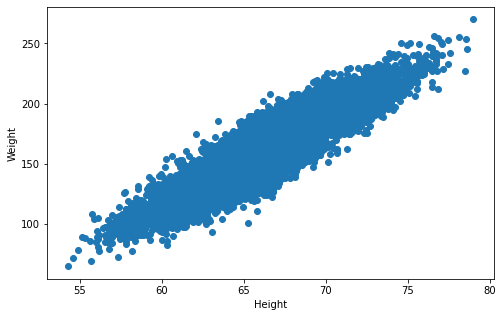

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(df["Height"], df["Weight"])
_ = ax.set_xlabel('Height')
_ = ax.set_ylabel('Weight')

In [4]:
y = df["Weight"].tolist()
X = df["Height"].tolist()

X_bar = statistics.mean(X)
y_bar = statistics.mean(y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_bar)*(y[i] - y_bar)
    den += (X[i] - X_bar)**2
b = num / den
a = y_bar - b * X_bar

print (a, b)

-350.7371918640255 7.7172876415861555


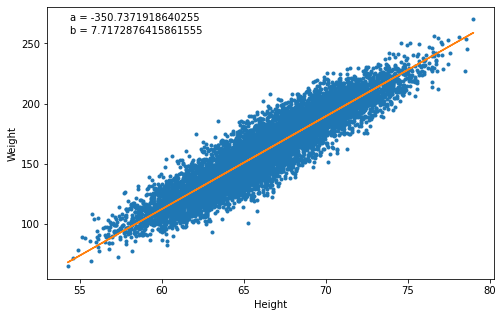

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))

X = df["Height"]

ax.plot(X, y, '.')
plt.plot(X, a + X * b, '-')
_ = ax.set_xlabel('Height')
_ = ax.set_ylabel('Weight')
_ = ax.annotate('a = {0}'.format(a), xy=(0.05, 0.95), xycoords='axes fraction')
_ = ax.annotate('b = {0}'.format(b), xy=(0.05, 0.9), xycoords='axes fraction')

In [6]:
height = 70
weight = a + b * height
print(weight)

189.4729430470054


In [7]:
rmse = 0
n = len(X)
for i in range(n):
    y_pred =  a + b* X[i]
    rmse += (y[i] - y_pred)**2
    
rmse = np.sqrt(rmse/n)
print(rmse)

12.218571271368567


In [8]:
sum_of_squares = 0
sum_of_residuals = 0
for i in range(n) :
    y_hat = a + b * X[i]
    sum_of_squares += (y[i] - y_bar)**2
    sum_of_residuals += (y[i] - y_hat)**2
    
r2  = 1 - (sum_of_residuals / sum_of_squares)
print(r2)

0.8551742121053622


In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df["Height"].values.reshape(-1, 1), df["Weight"])

print("Our a: {0}. Scikit Learn\'s a: {1}'".format(a, reg.intercept_))
print("Our b: {0}. Scikit Learn\'s b: {1}'".format(b, reg.coef_))

Our a: -350.7371918640255. Scikit Learn's a: -350.73719186403'
Our b: 7.7172876415861555. Scikit Learn's b: [7.71728764]'
